<a href="https://colab.research.google.com/github/bruno353/Machine-Learning/blob/main/Stroke_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [7]:
df.shape

(5110, 12)

In [8]:
df.bmi = df.bmi.fillna(df.bmi.mean())

In [9]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

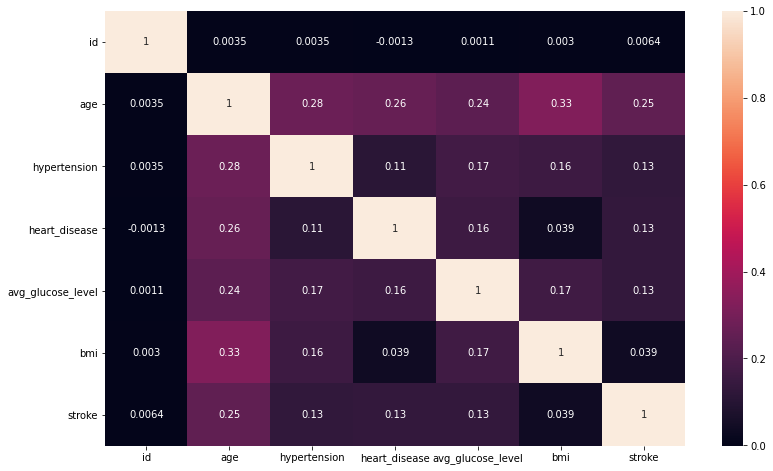

In [12]:
import seaborn as sns
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [14]:
df1 = df.drop('id', axis = 1)

In [15]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
from scipy.stats import skew
print(skew(df['age']))
print(skew(df['avg_glucose_level']))
print(skew(df['bmi']))

-0.1370190866396024
1.571822297397199
1.0763999841401004


In [19]:
df1["avg_glucose_level"] = np.log(df1["avg_glucose_level"])

In [20]:
print(skew(df1['avg_glucose_level']))

0.8824919557054105


In [21]:
df2 = df1.copy()

In [22]:
df2 = pd.get_dummies(df2, drop_first = True)

In [23]:
Y = df2.stroke

In [24]:
X = df2.drop('stroke', axis = 1)

In [25]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,5.432367,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,5.309307,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,4.662684,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,5.143008,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,5.159745,24.000000,0,0,1,0,0,1,0,0,0,1,0


In [26]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, shuffle = True)

In [37]:
features = ['age', 'avg_glucose_level', 'bmi']

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train[features])
X_test = sc.transform(X_test[features])

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
model.score(X_test, y_test)

0.9538341158059468

In [44]:
model.predict_proba(X_test)

array([[0.99165136, 0.00834864],
       [0.97932738, 0.02067262],
       [0.99896213, 0.00103787],
       ...,
       [0.99808365, 0.00191635],
       [0.96334575, 0.03665425],
       [0.80802693, 0.19197307]])